### Table of Contents
1. [Imports and Setup](#imports)
2. [Trying Out Utility Functions](#functions)
    * Add Functions here

###  Imports and Setup <a class="anchor" id="imports"></a>

In [18]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pathlib
import pprint
from tqdm import tqdm
from time import sleep

# Geocoding
from geopy.geocoders import Nominatim, GoogleV3
from geopy import location

# Magic Methods for Jupyter Notebooks
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
tqdm.pandas()

### TODO

Steps:
1. Load CSV with Addresses using Pandas
2. Convert Addresses to Coordinates using Geopy
3. Convert Coordinates to Points using Shapely
4. Using the Point Series and the DataFrame, Create a GeoDataFrame using GeoPandas
5. Create Plots from the GeoDataFrame or combinations thereof (Spatial Joins)

Create util functions for:
*  Address to Coordinates
* Coordinates to Points
    * Make sure columns are named similarly
* GeoDataFrame from Point Series and df
    * Make sure to have the appropriate CRS
* A function combining the functions
* A plotter function

Other Questions:
1. What kind of visualizations do I want to see on Dash?


### Trying out Utility Functions

Load CSV with Addresses using Pandas

In [23]:
CORN = "/home/therealmolf/nass_agri_dash/data/agri/corn.csv"

top_corn_producers = pd.read_csv(CORN)
top_corn_producers.head()

,state_name,commodity_desc,total_prod
0,ALABAMA,CORN,410217102
1,ARIZONA,CORN,39253542
2,ARKANSAS,CORN,1164904278
3,CALIFORNIA,CORN,154029219
4,COLORADO,CORN,2116689162


Convert Addresses to Coordinates using Geopy

In [41]:
geolocator = Nominatim(user_agent='http')


def geocode_with_sleep(row) -> pd.Series:
    """
       Limited geocoding to follow Nominatim Usage Limits 
    """
    
    query = row['state_name']
    sleep(1)
    location = geolocator.geocode(query)

    return pd.Series([location.longitude, location.latitude], \
                     index=['longitude', 'latitude'])


def get_coordinates(df: pd.DataFrame) -> pd.DataFrame:
    """
        Get Coordinates from State Names
    """

    # No side effects to input df
    df = df.copy()
    df[['longitude', 'latitude']] = df.progress_apply\
        (geocode_with_sleep, axis=1, result_type='expand')

    return df


In [42]:
df_with_coord = get_coordinates(top_corn_producers)

  0%|          | 0/49 [00:00<?, ?it/s]

100%|██████████| 49/49 [01:06<00:00,  1.35s/it]


In [ ]:
df_with_coord

In [6]:
# https://stackoverflow.com/questions/52600278/correct-way-to-use-geopy-nominatim

Convert Coordinates to Points using Shapely

In [44]:
points = df_with_coord.apply(lambda row: Point(row.longitude, row.latitude), axis=1)

Using the Point Series and the DataFrame, Create a GeoDataFrame using GeoPandas

In [46]:
corn_gpd = gpd.GeoDataFrame(df_with_coord, geometry=points)

Plotting the GeoDataFrame

<Axes: >

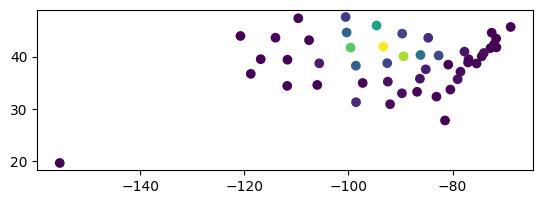

In [48]:
corn_gpd.plot(column="total_prod")